# World Bank - Foreign Aid Summarizing
Reduced '.csv' files from WB_data Notebook

In [1]:
# Dependencies and Setup
import pandas as pd
from pathlib import Path
import requests
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np
import time


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [2]:
# WB data set
WB_africadata_2000 = Path("Resources\WB_africadata_2000.csv")

In [3]:
# Read data file with the Pandas library
# encoding?, i.e encoding="ISO-8859-1"
WB_africadata_2000_df = pd.read_csv(WB_africadata_2000)

In [4]:
WB_africadata_2000_df

,series_id,country_code,country_name,year,value
0,SH.HIV.INCD.TL,KEN,Kenya,2017,3.400000e+04
1,SH.HIV.INCD.TL,LBR,Liberia,2017,1.600000e+03
2,SH.HIV.INCD.TL,LSO,Lesotho,2017,1.000000e+04
3,SH.HIV.INCD.TL,MDG,Madagascar,2017,7.200000e+03
4,SH.HIV.INCD.TL,MOZ,Mozambique,2017,1.300000e+05
...,...,...,...,...,...
652157,VA.NO.SRC,WSM,Samoa,2006,3.000000e+00
652158,FM.LBL.BMNY.GD.ZS,TCD,Chad,2010,1.146678e+01
652159,NE.CON.PRVT.CN.AD,SDN,Sudan,2000,2.199464e+10
652160,NE.CON.PRVT.CN.AD,SDN,Sudan,2003,3.190503e+10


# World Bank Data Source Break-down
###The 'WB_africadata_2000.csv' created in the WB_data notebook will be used to summarize the Foreign Aid data.

###To help with the anlysis of the data, the data was put in bins of 5 years from 2000 to 2020, and a last bin for 2021 to 2022.

In [5]:
WB_africadata_2000_df[["year"]].min()

year    2000
dtype: int64

In [6]:
WB_africadata_2000_df[["year"]].max()

year    2023
dtype: int64

In [7]:
WB_africadata_2000_df2 = WB_africadata_2000_df

In [8]:
# Create bins in which to place values based upon IMDB vote count
bins = [0, 2005, 2010, 2015, 2020, 2023]

# Create labels for these bins
group_labels = ["2000 - 2005", "2006 - 2010", "2011 - 2015", "2016 - 2020", "2021 - 2023"]

In [9]:
# Slice the data and place it into bins
pd.cut(WB_africadata_2000_df2["year"], bins, labels=group_labels)

0         2016 - 2020
1         2016 - 2020
2         2016 - 2020
3         2016 - 2020
4         2016 - 2020
             ...     
652157    2006 - 2010
652158    2006 - 2010
652159    2000 - 2005
652160    2000 - 2005
652161    2011 - 2015
Name: year, Length: 652162, dtype: category
Categories (5, object): ['2000 - 2005' < '2006 - 2010' < '2011 - 2015' < '2016 - 2020' < '2021 - 2023']

In [10]:
WB_africadata_2000_df2["Year Group"] = pd.cut(WB_africadata_2000_df2["year"], bins, labels=group_labels)

In [11]:
WB_africadata_2000_df2

,series_id,country_code,country_name,year,value,Year Group
0,SH.HIV.INCD.TL,KEN,Kenya,2017,3.400000e+04,2016 - 2020
1,SH.HIV.INCD.TL,LBR,Liberia,2017,1.600000e+03,2016 - 2020
2,SH.HIV.INCD.TL,LSO,Lesotho,2017,1.000000e+04,2016 - 2020
3,SH.HIV.INCD.TL,MDG,Madagascar,2017,7.200000e+03,2016 - 2020
4,SH.HIV.INCD.TL,MOZ,Mozambique,2017,1.300000e+05,2016 - 2020
...,...,...,...,...,...,...
652157,VA.NO.SRC,WSM,Samoa,2006,3.000000e+00,2006 - 2010
652158,FM.LBL.BMNY.GD.ZS,TCD,Chad,2010,1.146678e+01,2006 - 2010
652159,NE.CON.PRVT.CN.AD,SDN,Sudan,2000,2.199464e+10,2000 - 2005
652160,NE.CON.PRVT.CN.AD,SDN,Sudan,2003,3.190503e+10,2000 - 2005


In [12]:
country_counts = WB_africadata_2000_df2['country_name'].value_counts()

print("Counts of entries for each country name:")
print(country_counts)

Counts of entries for each country name:
Ghana                       23636
Egypt, Arab Rep.            23602
Senegal                     23478
Tanzania                    23326
Madagascar                  23133
Tunisia                     23069
Burkina Faso                22825
Togo                        22793
Kenya                       22709
Uganda                      22644
Mozambique                  22352
Rwanda                      22281
Malawi                      22053
Botswana                    22013
Lesotho                     21918
Nigeria                     21857
Ethiopia                    21735
Zambia                      21589
Angola                      21552
Sierra Leone                20680
Sudan                       20533
Zimbabwe                    20436
Mauritania                  20087
Gabon                       19102
Liberia                     19072
Chad                        18744
Samoa                       18738
Central African Republic    18315
Djibout

# Slicing of the Data
###In order to analyze the data and to understand the impact of the Foreign Aid with regards to poverty rate, literacy and mortality, the data was sliced by the "series_id". The deifinition of the diferent "series_id" values (indicators) is described in a second file downloaded from the Nasdaq API and saved as 'WB_metadata_df'.

###To facilitate/expedite the search and filtering of the relevant a function was created to search the text strings : "key_word". This function is case sensitive and it's used is combined with the review of the search output selection to identify the indicators that best match our work objective.

In [13]:
# WB id series definition data set
WB_metadata = Path("Resources/WB_METADATA_f7ce7fba293ccc6eb39cdf15fb097982.csv")

In [14]:
# Read data file with the Pandas library
WB_metadata_df = pd.read_csv(WB_metadata)

In [15]:
WB_metadata_df

,series_id,name,description
0,DC.DAC.DEUL.CD,"Net bilateral aid flows from DAC donors, Germa...",Net bilateral aid flows from DAC donors are th...
1,RQ.STD.ERR,Regulatory Quality: Standard Error,Regulatory Quality captures perceptions of the...
2,EG.USE.PCAP.KG.OE,Energy use (kg of oil equivalent per capita),Energy use refers to use of primary energy bef...
3,EN.POP.EL5M.UR.ZS,Urban population living in areas where elevati...,Urban population below 5m is the percentage of...
4,per_lm_alllm.cov_q1_tot,Coverage of unemployment benefits and ALMP in ...,Coverage of unemployment benefits and active l...
...,...,...,...
1479,SL.TLF.BASC.FE.ZS,"Labor force with basic education, female (% of...",The ratio of the labor force with basic educat...
1480,SL.GDP.PCAP.EM.KD,GDP per person employed (constant 2021 PPP $),GDP per person employed is gross domestic prod...
1481,SL.TLF.INTM.MA.ZS,"Labor force with intermediate education, male ...",The ratio of the labor force with intermediate...
1482,SL.UEM.NEET.FE.ZS,"Share of youth not in education, employment or...","Share of youth not in education, employment or..."


In [16]:
# This function will search within a text string for a given 'key word'. It is case sensitive

def key_word(df, search_col, word_txt, result_col):
    i=0   
    result_ls = []
    for item in df[search_col]:
        text_ls = [x.strip() for x in df[search_col][i].split()]
        if word_txt in text_ls:
            result_ls.append(df[result_col][i])
        i+=1
    if i >= df[search_col].count():
        if len(result_ls) > 0:
            return result_ls
        else:
            return print("Keyword Not found")

In [17]:
aid_search = key_word(WB_metadata_df, 'name', 'aid', 'series_id')

In [18]:
len(aid_search)

35

In [19]:
aid_search

['DC.DAC.DEUL.CD',
 'DC.DAC.NLDL.CD',
 'DT.ODA.ALLD.KD',
 'DC.DAC.JPNL.CD',
 'DC.DAC.NORL.CD',
 'DC.DAC.HUNL.CD',
 'DC.DAC.PRTL.CD',
 'DC.DAC.AUTL.CD',
 'DC.DAC.KORL.CD',
 'DC.DAC.ESPL.CD',
 'DC.DAC.CZEL.CD',
 'DC.DAC.CECL.CD',
 'DC.DAC.CHEL.CD',
 'DC.DAC.SVKL.CD',
 'DC.DAC.DNKL.CD',
 'DC.DAC.SWEL.CD',
 'DC.DAC.LUXL.CD',
 'DC.DAC.GBRL.CD',
 'DT.ODA.OATL.KD',
 'DC.DAC.NZLL.CD',
 'DC.DAC.ITAL.CD',
 'DC.DAC.IRLL.CD',
 'DC.DAC.FINL.CD',
 'DC.DAC.GRCL.CD',
 'DC.DAC.BELL.CD',
 'DC.DAC.ISLL.CD',
 'DC.DAC.TOTL.CD',
 'DC.DAC.CANL.CD',
 'DC.DAC.AUSL.CD',
 'DT.ODA.OATL.CD',
 'DC.DAC.USAL.CD',
 'DT.ODA.ALLD.CD',
 'DC.DAC.SVNL.CD',
 'DC.DAC.FRAL.CD',
 'DC.DAC.POLL.CD']

In [20]:
WB_aid_df = WB_africadata_2000_df2[WB_africadata_2000_df2["series_id"].isin(aid_search)]

In [21]:
WB_aid_df

,series_id,country_code,country_name,year,value,Year Group
1387,DC.DAC.DEUL.CD,DJI,Djibouti,2007,2.800000e+05,2006 - 2010
9540,DC.DAC.AUSL.CD,AGO,Angola,2000,9.000000e+05,2000 - 2005
9541,DC.DAC.AUSL.CD,EGY,"Egypt, Arab Rep.",2000,8.430000e+06,2000 - 2005
9542,DC.DAC.AUSL.CD,ETH,Ethiopia,2000,1.920000e+06,2000 - 2005
9543,DC.DAC.AUSL.CD,KEN,Kenya,2000,1.210000e+06,2000 - 2005
...,...,...,...,...,...,...
651512,DC.DAC.SVNL.CD,TUN,Tunisia,2019,4.000000e+04,2016 - 2020
651956,DC.DAC.FRAL.CD,GHA,Ghana,2005,3.790000e+07,2000 - 2005
651967,DC.DAC.FRAL.CD,TCD,Chad,2010,4.065000e+07,2006 - 2010
652143,DC.DAC.POLL.CD,RWA,Rwanda,2013,1.400000e+05,2011 - 2015


In [22]:
WB_aid_df[["year"]].min()

year    2000
dtype: int64

In [23]:
WB_aid_df[["year"]].max()

year    2022
dtype: int64

In [24]:
aid_counts = WB_aid_df['country_name'].value_counts()

print("Counts of entries for each country name:")
print(aid_counts)

Counts of entries for each country name:
Ethiopia                    698
Kenya                       692
Uganda                      688
Egypt, Arab Rep.            678
Sudan                       660
Tanzania                    649
Ghana                       648
Rwanda                      648
Mozambique                  645
Nigeria                     645
Zimbabwe                    639
Malawi                      626
Senegal                     621
Zambia                      611
Somalia                     609
Sierra Leone                605
Tunisia                     599
Angola                      595
Burkina Faso                576
Madagascar                  547
Liberia                     538
Central African Republic    527
Togo                        521
Chad                        518
Mauritania                  489
Lesotho                     455
Botswana                    453
Gabon                       384
Djibouti                    382
Sao Tome and Principe       359

In [25]:
WB_aid_df = WB_aid_df.rename(columns = {'value': 'Foreign Aid (USD)'})
WB_aid_df

,series_id,country_code,country_name,year,Foreign Aid (USD),Year Group
1387,DC.DAC.DEUL.CD,DJI,Djibouti,2007,2.800000e+05,2006 - 2010
9540,DC.DAC.AUSL.CD,AGO,Angola,2000,9.000000e+05,2000 - 2005
9541,DC.DAC.AUSL.CD,EGY,"Egypt, Arab Rep.",2000,8.430000e+06,2000 - 2005
9542,DC.DAC.AUSL.CD,ETH,Ethiopia,2000,1.920000e+06,2000 - 2005
9543,DC.DAC.AUSL.CD,KEN,Kenya,2000,1.210000e+06,2000 - 2005
...,...,...,...,...,...,...
651512,DC.DAC.SVNL.CD,TUN,Tunisia,2019,4.000000e+04,2016 - 2020
651956,DC.DAC.FRAL.CD,GHA,Ghana,2005,3.790000e+07,2000 - 2005
651967,DC.DAC.FRAL.CD,TCD,Chad,2010,4.065000e+07,2006 - 2010
652143,DC.DAC.POLL.CD,RWA,Rwanda,2013,1.400000e+05,2011 - 2015


In [26]:
# Split up our data into groups based upon 'country_name' and 'Year Group'
WB_aid_groups = WB_aid_df.groupby(['country_name','Year Group'])
WB_aid_groups.head()

,series_id,country_code,country_name,year,Foreign Aid (USD),Year Group
1387,DC.DAC.DEUL.CD,DJI,Djibouti,2007,2.800000e+05,2006 - 2010
9540,DC.DAC.AUSL.CD,AGO,Angola,2000,9.000000e+05,2000 - 2005
9541,DC.DAC.AUSL.CD,EGY,"Egypt, Arab Rep.",2000,8.430000e+06,2000 - 2005
9542,DC.DAC.AUSL.CD,ETH,Ethiopia,2000,1.920000e+06,2000 - 2005
9543,DC.DAC.AUSL.CD,KEN,Kenya,2000,1.210000e+06,2000 - 2005
...,...,...,...,...,...,...
86943,DC.DAC.SVNL.CD,AGO,Angola,2021,1.010000e+06,2021 - 2023
111307,DC.DAC.FRAL.CD,GAB,Gabon,2021,5.340000e+07,2021 - 2023
111310,DC.DAC.FRAL.CD,LBR,Liberia,2021,6.340000e+06,2021 - 2023
111314,DC.DAC.FRAL.CD,MRT,Mauritania,2021,-1.124000e+07,2021 - 2023


In [27]:
# Create a new variable that holds the sum of our groups
sum_aid = WB_aid_groups[['Foreign Aid (USD)']].sum()
sum_aid

Foreign Aid (USD)
country_name Year Group                    
Angola       2000 - 2005       1.263923e+10
             2006 - 2010       4.254470e+09
             2011 - 2015       4.649300e+09
             2016 - 2020       2.505720e+09
             2021 - 2023       1.262180e+09
...                                     ...
Zimbabwe     2000 - 2005       5.291520e+09
             2006 - 2010       1.113384e+10
             2011 - 2015       1.470307e+10
             2016 - 2020       1.414147e+10
             2021 - 2023       5.880880e+09

[155 rows x 1 columns]

In [28]:
total_aid = WB_aid_df.groupby("Year Group")["Foreign Aid (USD)"].sum()
total_aid

Year Group
2000 - 2005    3.678964e+11
2006 - 2010    4.986462e+11
2011 - 2015    5.386994e+11
2016 - 2020    5.849776e+11
2021 - 2023    2.786040e+11
Name: Foreign Aid (USD), dtype: float64

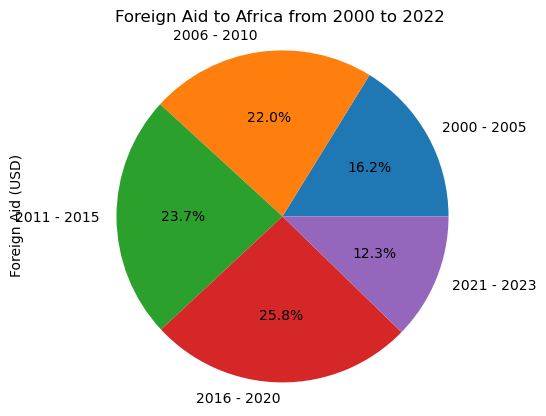

In [30]:
# Create a pie chart based upon the total aid over the period of 2000 to 2022
aid_pie = total_aid.plot(kind="pie", y='Foreign Aid (USD)', title=("Foreign Aid to Africa from 2000 to 2022 "), autopct="%1.1f%%")                                                                       
aid_pie.set_ylabel("Foreign Aid (USD)")

plt.axis("equal")
plt.show()

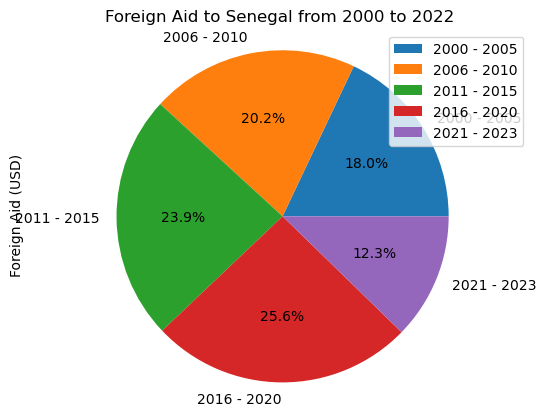

In [31]:
# Make a variable called country and store a 'country_name' in it
country = "Senegal"

# Collect all the aid values of the country above
just_one_country = sum_aid.loc[country]

# Create a pie chart based upon the total aid value of that single country
country_pie = just_one_country.plot(kind="pie", y='Foreign Aid (USD)', title=("Foreign Aid to " + country + " from 2000 to 2022 "), autopct="%1.1f%%")                                                                       
country_pie.set_ylabel("Foreign Aid (USD)")

plt.axis("equal")
plt.show()

In [32]:
# Split up our data into groups based upon 'country_name' and 'Year Group'
WB_aid_country_groups = WB_aid_df.groupby(['Year Group','country_name'])
WB_aid_country_groups.head()

,series_id,country_code,country_name,year,Foreign Aid (USD),Year Group
1387,DC.DAC.DEUL.CD,DJI,Djibouti,2007,2.800000e+05,2006 - 2010
9540,DC.DAC.AUSL.CD,AGO,Angola,2000,9.000000e+05,2000 - 2005
9541,DC.DAC.AUSL.CD,EGY,"Egypt, Arab Rep.",2000,8.430000e+06,2000 - 2005
9542,DC.DAC.AUSL.CD,ETH,Ethiopia,2000,1.920000e+06,2000 - 2005
9543,DC.DAC.AUSL.CD,KEN,Kenya,2000,1.210000e+06,2000 - 2005
...,...,...,...,...,...,...
86943,DC.DAC.SVNL.CD,AGO,Angola,2021,1.010000e+06,2021 - 2023
111307,DC.DAC.FRAL.CD,GAB,Gabon,2021,5.340000e+07,2021 - 2023
111310,DC.DAC.FRAL.CD,LBR,Liberia,2021,6.340000e+06,2021 - 2023
111314,DC.DAC.FRAL.CD,MRT,Mauritania,2021,-1.124000e+07,2021 - 2023


In [33]:
## This code is not working
# Create a new variable that holds the sum of our groups
sum_country_up = WB_aid_country_groups[['Foreign Aid (USD)']].sum()
sum_country_up

Foreign Aid (USD)
Year Group  country_name                               
2000 - 2005 Angola                         1.263923e+10
            Botswana                       9.264500e+08
            Burkina Faso                   1.106256e+10
            Central African Republic       1.827140e+09
            Chad                           5.446560e+09
...                                                 ...
2021 - 2023 Togo                           2.276800e+09
            Tunisia                        9.165500e+09
            Uganda                         1.498224e+10
            Zambia                         8.706660e+09
            Zimbabwe                       5.880880e+09

[155 rows x 1 columns]

In [34]:
country_aid = sum_country_up.groupby("country_name")["Foreign Aid (USD)"].sum()
country_aid

country_name
Angola                      2.531090e+10
Botswana                    1.043736e+10
Burkina Faso                7.217095e+10
Central African Republic    2.670185e+10
Chad                        3.852885e+10
Djibouti                    1.037578e+10
Egypt, Arab Rep.            1.421249e+11
Ethiopia                    2.356996e+11
Gabon                       6.272790e+09
Ghana                       9.354143e+10
Kenya                       1.478779e+11
Lesotho                     1.098769e+10
Liberia                     4.297603e+10
Madagascar                  5.070068e+10
Malawi                      7.126816e+10
Mauritania                  2.370442e+10
Mozambique                  1.470478e+11
Nigeria                     2.051604e+11
Rwanda                      6.629324e+10
Samoa                       6.678100e+09
Sao Tome and Principe       3.571580e+09
Senegal                     7.471741e+10
Sierra Leone                3.868017e+10
Somalia                     8.420974e+10
Sud

In [35]:
avg_country_aid = sum_country_up.groupby("country_name")["Foreign Aid (USD)"].mean()
avg_country_aid

country_name
Angola                      5.062180e+09
Botswana                    2.087472e+09
Burkina Faso                1.443419e+10
Central African Republic    5.340370e+09
Chad                        7.705770e+09
Djibouti                    2.075156e+09
Egypt, Arab Rep.            2.842498e+10
Ethiopia                    4.713991e+10
Gabon                       1.254558e+09
Ghana                       1.870829e+10
Kenya                       2.957558e+10
Lesotho                     2.197538e+09
Liberia                     8.595206e+09
Madagascar                  1.014014e+10
Malawi                      1.425363e+10
Mauritania                  4.740884e+09
Mozambique                  2.940956e+10
Nigeria                     4.103208e+10
Rwanda                      1.325865e+10
Samoa                       1.335620e+09
Sao Tome and Principe       7.143160e+08
Senegal                     1.494348e+10
Sierra Leone                7.736034e+09
Somalia                     1.684195e+10
Sud

In [36]:
mod_country_aid = sum_country_up.groupby("country_name")["Foreign Aid (USD)"].mod()
mod_country_aid

AttributeError: 'SeriesGroupBy' object has no attribute 'mod'

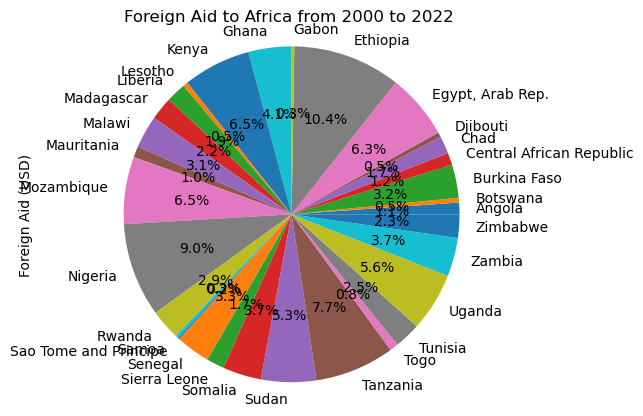

In [37]:
# Create a pie chart based upon the total aid over the period of 2000 to 2022
country_pie = country_aid.plot(kind="pie", y='Foreign Aid (USD)', title=("Foreign Aid to Africa from 2000 to 2022 "), autopct="%1.1f%%")                                                                       
country_pie.set_ylabel("Foreign Aid (USD)")

plt.axis("equal")
plt.show()

In [38]:
sum_country_up2 = sum_country_up.reset_index()

In [39]:
africa_aid_pivot = sum_country_up2.pivot(index='country_name', columns='Year Group', values='Foreign Aid (USD)')
africa_aid_pivot

Year Group,2000 - 2005,2006 - 2010,2011 - 2015,2016 - 2020,2021 - 2023
country_name,,,,,
Angola,1.263923e+10,4.254470e+09,4.649300e+09,2.505720e+09,1.262180e+09
Botswana,9.264500e+08,5.390210e+09,1.843480e+09,1.622260e+09,6.549600e+08
Burkina Faso,1.106256e+10,1.507039e+10,1.744345e+10,1.916816e+10,9.426390e+09
Central African Republic,1.827140e+09,3.634920e+09,6.272390e+09,1.066238e+10,4.305020e+09
Chad,5.446560e+09,8.110950e+09,8.499270e+09,1.195346e+10,4.518610e+09
Djibouti,1.540280e+09,2.232330e+09,2.619970e+09,3.191780e+09,7.914200e+08
"Egypt, Arab Rep.",3.163293e+10,1.988860e+10,3.232078e+10,2.355072e+10,3.473186e+10
Ethiopia,3.083171e+10,4.642122e+10,5.658849e+10,7.260455e+10,2.925360e+10
Gabon,7.052600e+08,1.242440e+09,1.694340e+09,1.735480e+09,8.952700e+08


In [40]:
africa_aid_pivot2 = pd.concat([africa_aid_pivot, country_aid], axis=1)
africa_aid_pivot2

,2000 - 2005,2006 - 2010,2011 - 2015,2016 - 2020,2021 - 2023,Foreign Aid (USD)
country_name,,,,,,
Angola,1.263923e+10,4.254470e+09,4.649300e+09,2.505720e+09,1.262180e+09,2.531090e+10
Botswana,9.264500e+08,5.390210e+09,1.843480e+09,1.622260e+09,6.549600e+08,1.043736e+10
Burkina Faso,1.106256e+10,1.507039e+10,1.744345e+10,1.916816e+10,9.426390e+09,7.217095e+10
Central African Republic,1.827140e+09,3.634920e+09,6.272390e+09,1.066238e+10,4.305020e+09,2.670185e+10
Chad,5.446560e+09,8.110950e+09,8.499270e+09,1.195346e+10,4.518610e+09,3.852885e+10
Djibouti,1.540280e+09,2.232330e+09,2.619970e+09,3.191780e+09,7.914200e+08,1.037578e+10
"Egypt, Arab Rep.",3.163293e+10,1.988860e+10,3.232078e+10,2.355072e+10,3.473186e+10,1.421249e+11
Ethiopia,3.083171e+10,4.642122e+10,5.658849e+10,7.260455e+10,2.925360e+10,2.356996e+11
Gabon,7.052600e+08,1.242440e+09,1.694340e+09,1.735480e+09,8.952700e+08,6.272790e+09


In [41]:
africa_aid_pivot2 = africa_aid_pivot2.rename(columns = {'2000 - 2005': 'Aid 2000 - 2005', '2006 - 2010': 'Aid 2006 - 2010','2011 - 2015': 'Aid 2011 - 2015', '2016 - 2020': 'Aid 2016 - 2020', '2021 - 2023': 'Aid 2021 - 2022', 'Foreign Aid (USD)': 'Total Foreign Aid (USD)'})
africa_aid_pivot2

,Aid 2000 - 2005,Aid 2006 - 2010,Aid 2011 - 2015,Aid 2016 - 2020,Aid 2021 - 2022,Total Foreign Aid (USD)
country_name,,,,,,
Angola,1.263923e+10,4.254470e+09,4.649300e+09,2.505720e+09,1.262180e+09,2.531090e+10
Botswana,9.264500e+08,5.390210e+09,1.843480e+09,1.622260e+09,6.549600e+08,1.043736e+10
Burkina Faso,1.106256e+10,1.507039e+10,1.744345e+10,1.916816e+10,9.426390e+09,7.217095e+10
Central African Republic,1.827140e+09,3.634920e+09,6.272390e+09,1.066238e+10,4.305020e+09,2.670185e+10
Chad,5.446560e+09,8.110950e+09,8.499270e+09,1.195346e+10,4.518610e+09,3.852885e+10
Djibouti,1.540280e+09,2.232330e+09,2.619970e+09,3.191780e+09,7.914200e+08,1.037578e+10
"Egypt, Arab Rep.",3.163293e+10,1.988860e+10,3.232078e+10,2.355072e+10,3.473186e+10,1.421249e+11
Ethiopia,3.083171e+10,4.642122e+10,5.658849e+10,7.260455e+10,2.925360e+10,2.356996e+11
Gabon,7.052600e+08,1.242440e+09,1.694340e+09,1.735480e+09,8.952700e+08,6.272790e+09


In [42]:
africa_aid_pivot2['Total Foreign Aid (USD)'].sum()

2268823651457.7856

In [43]:
africa_aid_pivot3 = africa_aid_pivot2.reset_index()
africa_aid_pivot3

,country_name,Aid 2000 - 2005,Aid 2006 - 2010,Aid 2011 - 2015,Aid 2016 - 2020,Aid 2021 - 2022,Total Foreign Aid (USD)
0,Angola,1.263923e+10,4.254470e+09,4.649300e+09,2.505720e+09,1.262180e+09,2.531090e+10
1,Botswana,9.264500e+08,5.390210e+09,1.843480e+09,1.622260e+09,6.549600e+08,1.043736e+10
2,Burkina Faso,1.106256e+10,1.507039e+10,1.744345e+10,1.916816e+10,9.426390e+09,7.217095e+10
3,Central African Republic,1.827140e+09,3.634920e+09,6.272390e+09,1.066238e+10,4.305020e+09,2.670185e+10
4,Chad,5.446560e+09,8.110950e+09,8.499270e+09,1.195346e+10,4.518610e+09,3.852885e+10
5,Djibouti,1.540280e+09,2.232330e+09,2.619970e+09,3.191780e+09,7.914200e+08,1.037578e+10
6,"Egypt, Arab Rep.",3.163293e+10,1.988860e+10,3.232078e+10,2.355072e+10,3.473186e+10,1.421249e+11
7,Ethiopia,3.083171e+10,4.642122e+10,5.658849e+10,7.260455e+10,2.925360e+10,2.356996e+11
8,Gabon,7.052600e+08,1.242440e+09,1.694340e+09,1.735480e+09,8.952700e+08,6.272790e+09
9,Ghana,1.985913e+10,2.153037e+10,2.426050e+10,2.063301e+10,7.258420e+09,9.354143e+10


In [44]:
africa_aid_pivot3['Total Foreign Aid (USD)'].sum()

2268823651457.7856

In [45]:
country_aid_pivot = sum_country_up2.pivot(index='Year Group', columns='country_name', values='Foreign Aid (USD)')
country_aid_pivot

country_name,Angola,Botswana,Burkina Faso,Central African Republic,Chad,Djibouti,"Egypt, Arab Rep.",Ethiopia,Gabon,Ghana,...,Senegal,Sierra Leone,Somalia,Sudan,Tanzania,Togo,Tunisia,Uganda,Zambia,Zimbabwe
Year Group,,,,,,,,,,,,,,,,,,,,,
2000 - 2005,1.263923e+10,9.264500e+08,1.106256e+10,1.827140e+09,5.446560e+09,1.540280e+09,3.163293e+10,3.083171e+10,7.052600e+08,1.985913e+10,...,1.341442e+10,7.235940e+09,4.213550e+09,1.713496e+10,3.281620e+10,1.496040e+09,7.886070e+09,2.171436e+10,2.007101e+10,5.291520e+09
2006 - 2010,4.254470e+09,5.390210e+09,1.507039e+10,3.634920e+09,8.110950e+09,2.232330e+09,1.988860e+10,4.642122e+10,1.242440e+09,2.153037e+10,...,1.511882e+10,7.283330e+09,1.056356e+10,4.316945e+10,3.999050e+10,4.984490e+09,8.425100e+09,2.726172e+10,2.057652e+10,1.113384e+10
2011 - 2015,4.649300e+09,1.843480e+09,1.744345e+10,6.272390e+09,8.499270e+09,2.619970e+09,3.232078e+10,5.658849e+10,1.694340e+09,2.426050e+10,...,1.785730e+10,1.046366e+10,1.974655e+10,2.321091e+10,4.630096e+10,4.601270e+09,1.556950e+10,2.781206e+10,1.761756e+10,1.470307e+10
2016 - 2020,2.505720e+09,1.622260e+09,1.916816e+10,1.066238e+10,1.195346e+10,3.191780e+09,2.355072e+10,7.260455e+10,1.735480e+09,2.063301e+10,...,1.914516e+10,1.024983e+10,3.424368e+10,2.043670e+10,3.940265e+10,5.173950e+09,1.652723e+10,3.591504e+10,1.758291e+10,1.414147e+10
2021 - 2023,1.262180e+09,6.549600e+08,9.426390e+09,4.305020e+09,4.518610e+09,7.914200e+08,3.473186e+10,2.925360e+10,8.952700e+08,7.258420e+09,...,9.181710e+09,3.447410e+09,1.544240e+10,1.630511e+10,1.552172e+10,2.276800e+09,9.165500e+09,1.498224e+10,8.706660e+09,5.880880e+09


In [46]:
WB_aid_df2 = WB_africadata_2000_df[WB_africadata_2000_df["series_id"].isin(aid_search)]
WB_aid_df2

,series_id,country_code,country_name,year,value,Year Group
1387,DC.DAC.DEUL.CD,DJI,Djibouti,2007,2.800000e+05,2006 - 2010
9540,DC.DAC.AUSL.CD,AGO,Angola,2000,9.000000e+05,2000 - 2005
9541,DC.DAC.AUSL.CD,EGY,"Egypt, Arab Rep.",2000,8.430000e+06,2000 - 2005
9542,DC.DAC.AUSL.CD,ETH,Ethiopia,2000,1.920000e+06,2000 - 2005
9543,DC.DAC.AUSL.CD,KEN,Kenya,2000,1.210000e+06,2000 - 2005
...,...,...,...,...,...,...
651512,DC.DAC.SVNL.CD,TUN,Tunisia,2019,4.000000e+04,2016 - 2020
651956,DC.DAC.FRAL.CD,GHA,Ghana,2005,3.790000e+07,2000 - 2005
651967,DC.DAC.FRAL.CD,TCD,Chad,2010,4.065000e+07,2006 - 2010
652143,DC.DAC.POLL.CD,RWA,Rwanda,2013,1.400000e+05,2011 - 2015


In [47]:
WB_aid_country_groups2 = WB_aid_df2.groupby(['country_name', 'year'])
WB_aid_country_groups2.head()

,series_id,country_code,country_name,year,value,Year Group
1387,DC.DAC.DEUL.CD,DJI,Djibouti,2007,2.800000e+05,2006 - 2010
9540,DC.DAC.AUSL.CD,AGO,Angola,2000,9.000000e+05,2000 - 2005
9541,DC.DAC.AUSL.CD,EGY,"Egypt, Arab Rep.",2000,8.430000e+06,2000 - 2005
9542,DC.DAC.AUSL.CD,ETH,Ethiopia,2000,1.920000e+06,2000 - 2005
9543,DC.DAC.AUSL.CD,KEN,Kenya,2000,1.210000e+06,2000 - 2005
...,...,...,...,...,...,...
204873,DT.ODA.ALLD.KD,WSM,Samoa,2015,1.080200e+08,2011 - 2015
204904,DT.ODA.ALLD.KD,WSM,Samoa,2016,9.976000e+07,2016 - 2020
204935,DT.ODA.ALLD.KD,WSM,Samoa,2017,1.488700e+08,2016 - 2020
204966,DT.ODA.ALLD.KD,WSM,Samoa,2018,1.370300e+08,2016 - 2020


In [48]:
sum_country_all = WB_aid_country_groups2[['value']].sum()
sum_country_all

value
country_name year              
Angola       2000  1.264020e+09
             2001  1.242170e+09
             2002  1.759030e+09
             2003  2.051470e+09
             2004  4.767360e+09
...                         ...
Zimbabwe     2018  2.723030e+09
             2019  2.922340e+09
             2020  3.408850e+09
             2021  3.260680e+09
             2022  2.620200e+09

[713 rows x 1 columns]

In [49]:
sum_country_all2 = sum_country_all.reset_index()

In [50]:
country_aid_pivot2 = sum_country_all2.pivot(index='year', columns='country_name', values='value')
country_aid_pivot2

country_name,Angola,Botswana,Burkina Faso,Central African Republic,Chad,Djibouti,"Egypt, Arab Rep.",Ethiopia,Gabon,Ghana,...,Senegal,Sierra Leone,Somalia,Sudan,Tanzania,Togo,Tunisia,Uganda,Zambia,Zimbabwe
year,,,,,,,,,,,,,,,,,,,,,
2000,1.264020e+09,1.340900e+08,1.048580e+09,3.028200e+08,4.898000e+08,2.675800e+08,5.949460e+09,2.687640e+09,4.889000e+07,2.266500e+09,...,1.781400e+09,7.238300e+08,4.403000e+08,8.013600e+08,4.272150e+09,2.898200e+08,1.023130e+09,3.445760e+09,3.082670e+09,8.142600e+08
2001,1.242170e+09,1.225300e+08,1.555170e+09,3.234500e+08,7.313400e+08,2.264600e+08,5.694220e+09,3.818770e+09,3.438000e+07,2.494700e+09,...,1.622930e+09,1.303290e+09,6.342500e+08,7.783200e+08,5.302940e+09,1.884600e+08,1.712300e+09,3.087800e+09,2.123760e+09,7.283000e+08
2002,1.759030e+09,1.666200e+08,1.751830e+09,2.403300e+08,8.163700e+08,2.652400e+08,5.635240e+09,4.590960e+09,3.222500e+08,2.645900e+09,...,1.735400e+09,1.474980e+09,6.534100e+08,1.281920e+09,5.222390e+09,2.194100e+08,9.878400e+08,2.880270e+09,2.991970e+09,8.717700e+08
2003,2.051470e+09,1.187900e+08,1.984150e+09,1.946300e+08,8.689100e+08,2.729900e+08,4.106150e+09,6.242520e+09,-5.346000e+07,3.425880e+09,...,1.785440e+09,1.266870e+09,7.351300e+08,2.644230e+09,6.352000e+09,2.205900e+08,1.284600e+09,3.731400e+09,3.164210e+09,7.895700e+08
2004,4.767360e+09,1.793700e+08,2.293860e+09,4.245200e+08,1.181890e+09,2.319600e+08,6.167180e+09,6.440020e+09,1.552100e+08,5.106280e+09,...,3.991270e+09,1.292470e+09,8.094300e+08,4.125700e+09,6.334600e+09,2.617400e+08,1.361420e+09,4.351780e+09,4.233770e+09,8.082500e+08
2005,1.555180e+09,2.050500e+08,2.428970e+09,3.413900e+08,1.358250e+09,2.760500e+08,4.080680e+09,7.051800e+09,1.979900e+08,3.919870e+09,...,2.497980e+09,1.174500e+09,9.410300e+08,7.503430e+09,5.332120e+09,3.160200e+08,1.516780e+09,4.217350e+09,4.474630e+09,1.279370e+09
2006,5.575600e+08,2.756100e+08,3.001130e+09,4.503900e+08,1.057630e+09,4.316300e+08,3.549220e+09,6.885890e+09,1.358900e+08,3.988150e+09,...,2.970250e+09,1.290430e+09,1.567810e+09,8.183240e+09,6.455920e+09,3.033400e+08,1.803700e+09,5.643320e+09,5.654470e+09,1.107100e+09
2007,7.998300e+08,4.231300e+08,2.828970e+09,6.665400e+08,1.324750e+09,3.731800e+08,4.551500e+09,7.867030e+09,1.943800e+08,3.492530e+09,...,2.612310e+09,1.954630e+09,1.488960e+09,8.368020e+09,8.828090e+09,4.456700e+08,1.311930e+09,5.096000e+09,3.514990e+09,1.866270e+09
2008,1.239280e+09,2.944200e+09,2.893750e+09,8.419200e+08,1.808880e+09,4.212900e+08,5.954060e+09,1.032913e+10,2.295300e+08,3.784470e+09,...,3.270920e+09,1.098200e+09,2.990110e+09,9.536690e+09,6.984580e+09,9.888200e+08,1.413070e+09,5.531530e+09,3.840530e+09,2.473630e+09


In [51]:
country_aid_pivot2["Angola"] = country_aid_pivot2["Angola"].map("${:,.2f}".format)

In [52]:
country_aid_pivot2

country_name,Angola,Botswana,Burkina Faso,Central African Republic,Chad,Djibouti,"Egypt, Arab Rep.",Ethiopia,Gabon,Ghana,...,Senegal,Sierra Leone,Somalia,Sudan,Tanzania,Togo,Tunisia,Uganda,Zambia,Zimbabwe
year,,,,,,,,,,,,,,,,,,,,,
2000,"$1,264,019,978.46",1.340900e+08,1.048580e+09,3.028200e+08,4.898000e+08,2.675800e+08,5.949460e+09,2.687640e+09,4.889000e+07,2.266500e+09,...,1.781400e+09,7.238300e+08,4.403000e+08,8.013600e+08,4.272150e+09,2.898200e+08,1.023130e+09,3.445760e+09,3.082670e+09,8.142600e+08
2001,"$1,242,169,993.36",1.225300e+08,1.555170e+09,3.234500e+08,7.313400e+08,2.264600e+08,5.694220e+09,3.818770e+09,3.438000e+07,2.494700e+09,...,1.622930e+09,1.303290e+09,6.342500e+08,7.783200e+08,5.302940e+09,1.884600e+08,1.712300e+09,3.087800e+09,2.123760e+09,7.283000e+08
2002,"$1,759,030,003.64",1.666200e+08,1.751830e+09,2.403300e+08,8.163700e+08,2.652400e+08,5.635240e+09,4.590960e+09,3.222500e+08,2.645900e+09,...,1.735400e+09,1.474980e+09,6.534100e+08,1.281920e+09,5.222390e+09,2.194100e+08,9.878400e+08,2.880270e+09,2.991970e+09,8.717700e+08
2003,"$2,051,469,971.36",1.187900e+08,1.984150e+09,1.946300e+08,8.689100e+08,2.729900e+08,4.106150e+09,6.242520e+09,-5.346000e+07,3.425880e+09,...,1.785440e+09,1.266870e+09,7.351300e+08,2.644230e+09,6.352000e+09,2.205900e+08,1.284600e+09,3.731400e+09,3.164210e+09,7.895700e+08
2004,"$4,767,359,934.42",1.793700e+08,2.293860e+09,4.245200e+08,1.181890e+09,2.319600e+08,6.167180e+09,6.440020e+09,1.552100e+08,5.106280e+09,...,3.991270e+09,1.292470e+09,8.094300e+08,4.125700e+09,6.334600e+09,2.617400e+08,1.361420e+09,4.351780e+09,4.233770e+09,8.082500e+08
2005,"$1,555,179,979.22",2.050500e+08,2.428970e+09,3.413900e+08,1.358250e+09,2.760500e+08,4.080680e+09,7.051800e+09,1.979900e+08,3.919870e+09,...,2.497980e+09,1.174500e+09,9.410300e+08,7.503430e+09,5.332120e+09,3.160200e+08,1.516780e+09,4.217350e+09,4.474630e+09,1.279370e+09
2006,"$557,560,005.66",2.756100e+08,3.001130e+09,4.503900e+08,1.057630e+09,4.316300e+08,3.549220e+09,6.885890e+09,1.358900e+08,3.988150e+09,...,2.970250e+09,1.290430e+09,1.567810e+09,8.183240e+09,6.455920e+09,3.033400e+08,1.803700e+09,5.643320e+09,5.654470e+09,1.107100e+09
2007,"$799,829,997.48",4.231300e+08,2.828970e+09,6.665400e+08,1.324750e+09,3.731800e+08,4.551500e+09,7.867030e+09,1.943800e+08,3.492530e+09,...,2.612310e+09,1.954630e+09,1.488960e+09,8.368020e+09,8.828090e+09,4.456700e+08,1.311930e+09,5.096000e+09,3.514990e+09,1.866270e+09
2008,"$1,239,279,997.13",2.944200e+09,2.893750e+09,8.419200e+08,1.808880e+09,4.212900e+08,5.954060e+09,1.032913e+10,2.295300e+08,3.784470e+09,...,3.270920e+09,1.098200e+09,2.990110e+09,9.536690e+09,6.984580e+09,9.888200e+08,1.413070e+09,5.531530e+09,3.840530e+09,2.473630e+09


In [53]:
poverty_search = key_word(WB_metadata_df, 'name', 'poverty', 'series_id')

In [54]:
len(poverty_search)

17

In [55]:
poverty_search

['SH.UHC.NOP2.TO',
 'SH.UHC.NOP2.ZS',
 'SH.UHC.NOP1.ZS',
 'SH.UHC.NOP1.ZG',
 'SH.UHC.NOP1.CG',
 'SH.UHC.NOP2.CG',
 'SH.UHC.NOP1.TO',
 'SH.UHC.NOP2.ZG',
 'SI.POV.MDIM.17.XQ',
 'SI.POV.MDIM.MA',
 'SI.POV.MDIM.XQ',
 'SI.POV.MDIM.FE',
 'SI.POV.MDIM.HH',
 'SI.POV.MDIM',
 'SI.POV.MDIM.17',
 'SI.POV.NAHC',
 'SI.POV.MDIM.IT']

In [56]:
poverty_search2 = WB_metadata_df[WB_metadata_df['series_id'].isin(poverty_search)]

In [57]:
poverty_search2

,series_id,name,description
19,SH.UHC.NOP2.TO,Number of people pushed below the $3.65 ($ 201...,Number of people pushed below the $3.65 ($ 201...
103,SH.UHC.NOP2.ZS,Proportion of population pushed below the $3.6...,This indicator shows the fraction of a country...
143,SH.UHC.NOP1.ZS,Proportion of population pushed below the $2.1...,This indicator shows the fraction of a country...
527,SH.UHC.NOP1.ZG,Increase in poverty gap at $1.90 ($ 2011 PPP) ...,Increase in poverty gap at $1.90 ($ 2011 PPP) ...
528,SH.UHC.NOP1.CG,Increase in poverty gap at $1.90 ($ 2011 PPP) ...,Increase in poverty gap at $1.90 ($ 2011 PPP) ...
529,SH.UHC.NOP2.CG,Increase in poverty gap at $3.20 ($ 2011 PPP) ...,Increase in poverty gap at $3.20 ($ 2011 PPP) ...
546,SH.UHC.NOP1.TO,Number of people pushed below the $2.15 ($ 201...,Number of people pushed below the $2.15 ($ 201...
926,SH.UHC.NOP2.ZG,Increase in poverty gap at $3.20 ($ 2011 PPP) ...,Increase in poverty gap at $3.20 ($ 2011 PPP) ...
1271,SI.POV.MDIM.17.XQ,"Multidimensional poverty index, children (popu...",Proportion of the child population that is mul...
1305,SI.POV.MDIM.MA,"Multidimensional poverty headcount ratio, male...",The percentage of male population who are mult...


In [58]:
WB_poverty_df = WB_africadata_2000_df2.loc[WB_africadata_2000_df2['series_id'] == "SI.POV.MDIM.XQ"]
WB_poverty_df


,series_id,country_code,country_name,year,value,Year Group
144736,SI.POV.MDIM.XQ,UGA,Uganda,2016,0.250,2016 - 2020
144737,SI.POV.MDIM.XQ,UGA,Uganda,2019,0.230,2016 - 2020
144738,SI.POV.MDIM.XQ,NGA,Nigeria,2021,0.257,2021 - 2023
514566,SI.POV.MDIM.XQ,GHA,Ghana,2010,0.179,2006 - 2010
514567,SI.POV.MDIM.XQ,RWA,Rwanda,2010,0.240,2006 - 2010
514568,SI.POV.MDIM.XQ,GHA,Ghana,2011,0.298,2011 - 2015
514569,SI.POV.MDIM.XQ,RWA,Rwanda,2013,0.170,2011 - 2015
514570,SI.POV.MDIM.XQ,MOZ,Mozambique,2014,0.310,2011 - 2015
514571,SI.POV.MDIM.XQ,AGO,Angola,2015,0.264,2011 - 2015
514572,SI.POV.MDIM.XQ,GHA,Ghana,2016,0.236,2016 - 2020


In [59]:
WB_poverty_country_groups = WB_poverty_df.groupby(['Year Group','country_name'])
WB_poverty_country_groups.head()

,series_id,country_code,country_name,year,value,Year Group
144736,SI.POV.MDIM.XQ,UGA,Uganda,2016,0.250,2016 - 2020
144737,SI.POV.MDIM.XQ,UGA,Uganda,2019,0.230,2016 - 2020
144738,SI.POV.MDIM.XQ,NGA,Nigeria,2021,0.257,2021 - 2023
514566,SI.POV.MDIM.XQ,GHA,Ghana,2010,0.179,2006 - 2010
514567,SI.POV.MDIM.XQ,RWA,Rwanda,2010,0.240,2006 - 2010
514568,SI.POV.MDIM.XQ,GHA,Ghana,2011,0.298,2011 - 2015
514569,SI.POV.MDIM.XQ,RWA,Rwanda,2013,0.170,2011 - 2015
514570,SI.POV.MDIM.XQ,MOZ,Mozambique,2014,0.310,2011 - 2015
514571,SI.POV.MDIM.XQ,AGO,Angola,2015,0.264,2011 - 2015
514572,SI.POV.MDIM.XQ,GHA,Ghana,2016,0.236,2016 - 2020


In [60]:
pov_counts = WB_poverty_df['country_name'].value_counts()

print("Counts of entries for each country name:")
print(pov_counts)

Counts of entries for each country name:
Ghana         4
Rwanda        3
Uganda        2
Nigeria       1
Mozambique    1
Angola        1
Name: country_name, dtype: int64


In [61]:
Poverty_search = key_word(WB_metadata_df, 'name', 'Poverty', 'series_id')

In [62]:
Poverty_search

['SI.POV.UMIC.GP',
 'SI.POV.DDAY',
 'SI.POV.LMIC.GP',
 'SI.POV.LMIC',
 'SI.POV.UMIC',
 'SI.POV.NAHC',
 'SI.POV.GAPS']

In [63]:
Poverty_search2= WB_metadata_df[WB_metadata_df['series_id'].isin(Poverty_search)]

In [64]:
Poverty_search2

,series_id,name,description
85,SI.POV.UMIC.GP,Poverty gap at $6.85 a day (2017 PPP) (%),Poverty gap at $6.85 a day (2017 PPP) is the m...
148,SI.POV.DDAY,Poverty headcount ratio at $2.15 a day (2017 P...,Poverty headcount ratio at $2.15 a day is the ...
624,SI.POV.LMIC.GP,Poverty gap at $3.65 a day (2017 PPP) (%),Poverty gap at $3.65 a day (2017 PPP) is the m...
1074,SI.POV.LMIC,Poverty headcount ratio at $3.65 a day (2017 P...,Poverty headcount ratio at $3.65 a day is the ...
1169,SI.POV.UMIC,Poverty headcount ratio at $6.85 a day (2017 P...,Poverty headcount ratio at $6.85 a day is the ...
1314,SI.POV.NAHC,Poverty headcount ratio at national poverty li...,National poverty headcount ratio is the percen...
1318,SI.POV.GAPS,Poverty gap at $2.15 a day (2017 PPP) (%),Poverty gap at $2.15 a day (2017 PPP) is the m...


In [65]:
WB_Poverty_df = WB_africadata_2000_df2.loc[WB_africadata_2000_df2['series_id'] == "SI.POV.UMIC"]
WB_Poverty_df

,series_id,country_code,country_name,year,value,Year Group
124316,SI.POV.UMIC,AGO,Angola,2000,67.2,2000 - 2005
124317,SI.POV.UMIC,MRT,Mauritania,2000,80.9,2000 - 2005
124318,SI.POV.UMIC,RWA,Rwanda,2000,96.0,2000 - 2005
124319,SI.POV.UMIC,STP,Sao Tome and Principe,2000,87.0,2000 - 2005
124320,SI.POV.UMIC,TUN,Tunisia,2000,51.2,2000 - 2005
...,...,...,...,...,...,...
154379,SI.POV.UMIC,DJI,Djibouti,2013,80.6,2011 - 2015
492550,SI.POV.UMIC,CAF,Central African Republic,2003,95.2,2000 - 2005
522220,SI.POV.UMIC,NGA,Nigeria,2009,92.9,2006 - 2010
522221,SI.POV.UMIC,TZA,Tanzania,2017,91.8,2016 - 2020


In [66]:
WB_Poverty_df = WB_Poverty_df.rename(columns = {'value': 'Poverty Ratio < $6.85/day (% Pop.)'})
WB_Poverty_df

,series_id,country_code,country_name,year,Poverty Ratio < $6.85/day (% Pop.),Year Group
124316,SI.POV.UMIC,AGO,Angola,2000,67.2,2000 - 2005
124317,SI.POV.UMIC,MRT,Mauritania,2000,80.9,2000 - 2005
124318,SI.POV.UMIC,RWA,Rwanda,2000,96.0,2000 - 2005
124319,SI.POV.UMIC,STP,Sao Tome and Principe,2000,87.0,2000 - 2005
124320,SI.POV.UMIC,TUN,Tunisia,2000,51.2,2000 - 2005
...,...,...,...,...,...,...
154379,SI.POV.UMIC,DJI,Djibouti,2013,80.6,2011 - 2015
492550,SI.POV.UMIC,CAF,Central African Republic,2003,95.2,2000 - 2005
522220,SI.POV.UMIC,NGA,Nigeria,2009,92.9,2006 - 2010
522221,SI.POV.UMIC,TZA,Tanzania,2017,91.8,2016 - 2020


In [67]:
Pov_counts = WB_Poverty_df['country_name'].value_counts()

print("Counts of entries for each country name:")
print(Pov_counts)

Counts of entries for each country name:
Egypt, Arab Rep.            7
Nigeria                     6
Zambia                      6
Uganda                      6
Senegal                     5
Mauritania                  5
Togo                        5
Burkina Faso                5
Tanzania                    5
Tunisia                     5
Rwanda                      5
Kenya                       4
Djibouti                    4
Malawi                      4
Mozambique                  4
Madagascar                  4
Chad                        4
Liberia                     3
Central African Republic    3
Zimbabwe                    3
Ghana                       3
Angola                      3
Ethiopia                    3
Sierra Leone                3
Samoa                       3
Botswana                    3
Sao Tome and Principe       3
Gabon                       2
Lesotho                     2
Sudan                       2
Somalia                     1
Name: country_name, dtype: in

In [68]:
# Create a new variable that holds the sum of our groups
avg_Poverty = WB_Poverty_df[['Poverty Ratio < $6.85/day (% Pop.)']].mean()
avg_Poverty

Poverty Ratio < $6.85/day (% Pop.)    83.495041
dtype: float64

In [69]:
WB_Pov_country_groups = WB_Poverty_df.groupby(['Year Group','country_name'])
WB_Pov_country_groups.head()

,series_id,country_code,country_name,year,Poverty Ratio < $6.85/day (% Pop.),Year Group
124316,SI.POV.UMIC,AGO,Angola,2000,67.2,2000 - 2005
124317,SI.POV.UMIC,MRT,Mauritania,2000,80.9,2000 - 2005
124318,SI.POV.UMIC,RWA,Rwanda,2000,96.0,2000 - 2005
124319,SI.POV.UMIC,STP,Sao Tome and Principe,2000,87.0,2000 - 2005
124320,SI.POV.UMIC,TUN,Tunisia,2000,51.2,2000 - 2005
...,...,...,...,...,...,...
154379,SI.POV.UMIC,DJI,Djibouti,2013,80.6,2011 - 2015
492550,SI.POV.UMIC,CAF,Central African Republic,2003,95.2,2000 - 2005
522220,SI.POV.UMIC,NGA,Nigeria,2009,92.9,2006 - 2010
522221,SI.POV.UMIC,TZA,Tanzania,2017,91.8,2016 - 2020


In [70]:
avg_Poverty = WB_Pov_country_groups[['Poverty Ratio < $6.85/day (% Pop.)']].mean()
avg_Poverty

Poverty Ratio < $6.85/day (% Pop.)
Year Group  country_name                                                
2000 - 2005 Angola                                                  67.2
            Botswana                                                68.6
            Burkina Faso                                            93.8
            Central African Republic                                95.2
            Chad                                                    95.9
...                                                                  ...
2021 - 2023 Togo                                                    86.8
            Tunisia                                                 16.2
            Uganda                                                   NaN
            Zambia                                                  93.2
            Zimbabwe                                                 NaN

[155 rows x 1 columns]

In [71]:
avg_Poverty.dropna(how='all')

Poverty Ratio < $6.85/day (% Pop.)
Year Group  country_name                                                
2000 - 2005 Angola                                                  67.2
            Botswana                                                68.6
            Burkina Faso                                            93.8
            Central African Republic                                95.2
            Chad                                                    95.9
...                                                                  ...
2021 - 2023 Kenya                                                   91.3
            Senegal                                                 75.6
            Togo                                                    86.8
            Tunisia                                                 16.2
            Zambia                                                  93.2

[102 rows x 1 columns]

In [72]:
total_Pov = WB_Poverty_df.groupby("Year Group")["Poverty Ratio < $6.85/day (% Pop.)"].mean()
total_Pov

Year Group
2000 - 2005    85.624242
2006 - 2010    83.762500
2011 - 2015    81.557143
2016 - 2020    83.828571
2021 - 2023    79.525000
Name: Poverty Ratio < $6.85/day (% Pop.), dtype: float64

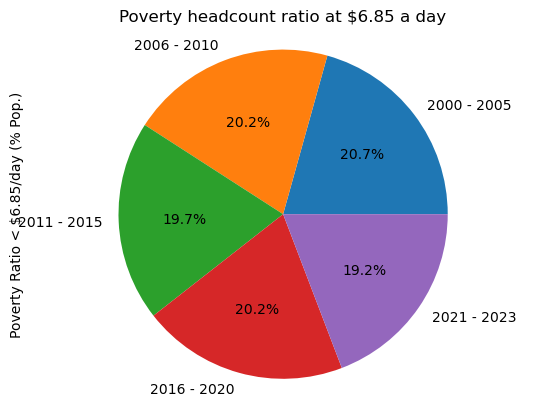

In [73]:
# Create a pie chart based upon the total aid over the period of 2000 to 2022
Poverty_pie = total_Pov.plot(kind="pie", y='Poverty Ratio < $6.85/day (% Pop.)', title=("Poverty headcount ratio at $6.85 a day"), autopct="%1.1f%%")                                                                       
country_pie.set_ylabel("Poverty Ratio < $6.85/day (% Pop.)")

plt.axis("equal")
plt.show()

In [74]:
#WB_aid_df2 = WB_africadata_2000_df[WB_africadata_2000_df["series_id"].isin(aid_search)]
#WB_aid_df2
WB_Poverty_df2 = WB_africadata_2000_df.loc[WB_africadata_2000_df['series_id'] == "SI.POV.UMIC"]
WB_Poverty_df2

,series_id,country_code,country_name,year,value,Year Group
124316,SI.POV.UMIC,AGO,Angola,2000,67.2,2000 - 2005
124317,SI.POV.UMIC,MRT,Mauritania,2000,80.9,2000 - 2005
124318,SI.POV.UMIC,RWA,Rwanda,2000,96.0,2000 - 2005
124319,SI.POV.UMIC,STP,Sao Tome and Principe,2000,87.0,2000 - 2005
124320,SI.POV.UMIC,TUN,Tunisia,2000,51.2,2000 - 2005
...,...,...,...,...,...,...
154379,SI.POV.UMIC,DJI,Djibouti,2013,80.6,2011 - 2015
492550,SI.POV.UMIC,CAF,Central African Republic,2003,95.2,2000 - 2005
522220,SI.POV.UMIC,NGA,Nigeria,2009,92.9,2006 - 2010
522221,SI.POV.UMIC,TZA,Tanzania,2017,91.8,2016 - 2020


In [75]:
WB_Pov_country_groups2 = WB_Poverty_df2.groupby(['country_name', 'year'])
WB_Pov_country_groups2.head()

,series_id,country_code,country_name,year,value,Year Group
124316,SI.POV.UMIC,AGO,Angola,2000,67.2,2000 - 2005
124317,SI.POV.UMIC,MRT,Mauritania,2000,80.9,2000 - 2005
124318,SI.POV.UMIC,RWA,Rwanda,2000,96.0,2000 - 2005
124319,SI.POV.UMIC,STP,Sao Tome and Principe,2000,87.0,2000 - 2005
124320,SI.POV.UMIC,TUN,Tunisia,2000,51.2,2000 - 2005
...,...,...,...,...,...,...
154379,SI.POV.UMIC,DJI,Djibouti,2013,80.6,2011 - 2015
492550,SI.POV.UMIC,CAF,Central African Republic,2003,95.2,2000 - 2005
522220,SI.POV.UMIC,NGA,Nigeria,2009,92.9,2006 - 2010
522221,SI.POV.UMIC,TZA,Tanzania,2017,91.8,2016 - 2020


In [76]:
sum_Pov_all = WB_Pov_country_groups2[['value']].sum()
sum_Pov_all

value
country_name year       
Angola       2000   67.2
             2008   68.9
             2018   78.0
Botswana     2002   68.6
             2009   60.4
...                  ...
Zambia       2015   91.0
             2022   93.2
Zimbabwe     2011   77.9
             2017   84.1
             2019   85.0

[121 rows x 1 columns]

In [77]:
sum_Pov_all2 = sum_Pov_all.reset_index()

In [81]:
country_Pov_pivot2 = sum_Pov_all2.pivot(index='year', columns='country_name', values='value')
country_Pov_pivot2

country_name,Angola,Botswana,Burkina Faso,Central African Republic,Chad,Djibouti,"Egypt, Arab Rep.",Ethiopia,Gabon,Ghana,...,Senegal,Sierra Leone,Somalia,Sudan,Tanzania,Togo,Tunisia,Uganda,Zambia,Zimbabwe
year,,,,,,,,,,,,,,,,,,,,,
2000,67.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,99.4,NaN,51.2,NaN,NaN,NaN
2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,94.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002,NaN,68.6,NaN,NaN,NaN,82.5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95.2,95.0,NaN
2003,NaN,NaN,93.8,95.2,95.9,NaN,NaN,NaN,NaN,NaN,...,NaN,94.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004,NaN,NaN,NaN,NaN,NaN,NaN,77.7,96.3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91.9,NaN
2005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.1,91.0,...,91.9,NaN,NaN,NaN,NaN,NaN,42.1,94.2,NaN,NaN
2006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,94.7,NaN,NaN,92.6,NaN
2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,95.3,NaN,NaN,NaN,NaN,NaN
2008,68.9,NaN,NaN,92.8,NaN,NaN,77.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
country_Pov_pivot3 = country_Pov_pivot2.reset_index()

In [84]:
country_Pov_pivot3.dropna(how='all')

country_name,year,Angola,Botswana,Burkina Faso,Central African Republic,Chad,Djibouti,"Egypt, Arab Rep.",Ethiopia,Gabon,...,Senegal,Sierra Leone,Somalia,Sudan,Tanzania,Togo,Tunisia,Uganda,Zambia,Zimbabwe
0,2000,67.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,99.4,NaN,51.2,NaN,NaN,NaN
1,2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,94.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2002,NaN,68.6,NaN,NaN,NaN,82.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95.2,95.0,NaN
3,2003,NaN,NaN,93.8,95.2,95.9,NaN,NaN,NaN,NaN,...,NaN,94.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2004,NaN,NaN,NaN,NaN,NaN,NaN,77.7,96.3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91.9,NaN
5,2005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.1,...,91.9,NaN,NaN,NaN,NaN,NaN,42.1,94.2,NaN,NaN
6,2006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,94.7,NaN,NaN,92.6,NaN
7,2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,95.3,NaN,NaN,NaN,NaN,NaN
8,2008,68.9,NaN,NaN,92.8,NaN,NaN,77.5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2009,NaN,60.4,94.9,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,82.8,NaN,NaN,NaN,91.1,NaN,NaN


In [79]:
country_Pov_pivot2["Angola"] = country_Pov_pivot2["Angola"].map("{:.1f}%".format)
country_Pov_pivot2

country_name,Angola,Botswana,Burkina Faso,Central African Republic,Chad,Djibouti,"Egypt, Arab Rep.",Ethiopia,Gabon,Ghana,...,Senegal,Sierra Leone,Somalia,Sudan,Tanzania,Togo,Tunisia,Uganda,Zambia,Zimbabwe
year,,,,,,,,,,,,,,,,,,,,,
2000,67.2%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,99.4,NaN,51.2,NaN,NaN,NaN
2001,nan%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,94.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002,nan%,68.6,NaN,NaN,NaN,82.5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95.2,95.0,NaN
2003,nan%,NaN,93.8,95.2,95.9,NaN,NaN,NaN,NaN,NaN,...,NaN,94.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004,nan%,NaN,NaN,NaN,NaN,NaN,77.7,96.3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91.9,NaN
2005,nan%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.1,91.0,...,91.9,NaN,NaN,NaN,NaN,NaN,42.1,94.2,NaN,NaN
2006,nan%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,94.7,NaN,NaN,92.6,NaN
2007,nan%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,95.3,NaN,NaN,NaN,NaN,NaN
2008,68.9%,NaN,NaN,92.8,NaN,NaN,77.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#WB_aid_df2 = WB_africadata_2000_df[WB_africadata_2000_df["series_id"].isin(aid_search)]
#WB_aid_df2
WB_Poverty_df2 = WB_africadata_2000_df.loc[WB_africadata_2000_df['series_id'] == "SI.POV.UMIC"]
WB_Poverty_df2

WB_Pov_country_groups2 = WB_Poverty_df2.groupby(['country_name', 'year'])
WB_Pov_country_groups2.head()

sum_Pov_all = WB_Pov_country_groups2[['value']].sum()
sum_Pov_all

sum_Pov_all2 = sum_Pov_all.reset_index()

country_Pov_pivot2 = sum_Pov_all2.pivot(index='year', columns='country_name', values='value')
country_Pov_pivot2

country_Pov_pivot2["Angola"] = country_Pov_pivot2["Angola"].map("{:.1f}%".format)
country_Pov_pivot2

In [85]:
Mortality_search = key_word(WB_metadata_df, 'name', 'Mortality', 'series_id')

In [86]:
Mortality_search

['SH.STA.AIRP.MA.P5',
 'SH.DYN.NCOM.FE.ZS',
 'SP.DYN.AMRT.FE',
 'SH.DYN.MORT.FE',
 'SH.DYN.MORT.MA',
 'SH.STA.WASH.P5',
 'SP.DYN.IMRT.MA.IN',
 'SP.DYN.IMRT.IN',
 'SH.DYN.MORT',
 'SP.DYN.AMRT.MA',
 'SH.STA.TRAF.P5',
 'SH.STA.AIRP.FE.P5',
 'SH.DYN.NMRT',
 'SH.STA.AIRP.P5',
 'SH.STA.POIS.P5.MA',
 'SH.STA.POIS.P5',
 'SH.STA.POIS.P5.FE',
 'SH.DYN.NCOM.MA.ZS',
 'SP.DYN.IMRT.FE.IN',
 'SH.DYN.NCOM.ZS']

In [87]:
Mortality_search2= WB_metadata_df[WB_metadata_df['series_id'].isin(Mortality_search)]

In [88]:
Mortality_search2

,series_id,name,description
35,SH.STA.AIRP.MA.P5,Mortality rate attributed to household and amb...,Mortality rate attributed to household and amb...
100,SH.DYN.NCOM.FE.ZS,"Mortality from CVD, cancer, diabetes or CRD be...","Mortality from CVD, cancer, diabetes or CRD is..."
106,SP.DYN.AMRT.FE,"Mortality rate, adult, female (per 1,000 femal...","Adult mortality rate, female, is the probabili..."
186,SH.DYN.MORT.FE,"Mortality rate, under-5, female (per 1,000 liv...","Under-five mortality rate, female is the proba..."
239,SH.DYN.MORT.MA,"Mortality rate, under-5, male (per 1,000 live ...","Under-five mortality rate, male is the probabi..."
281,SH.STA.WASH.P5,"Mortality rate attributed to unsafe water, uns...","Mortality rate attributed to unsafe water, uns..."
297,SP.DYN.IMRT.MA.IN,"Mortality rate, infant, male (per 1,000 live b...","Infant mortality rate, male is the number of m..."
354,SP.DYN.IMRT.IN,"Mortality rate, infant (per 1,000 live births)",Infant mortality rate is the number of infants...
356,SH.DYN.MORT,"Mortality rate, under-5 (per 1,000 live births)",Under-five mortality rate is the probability p...
481,SP.DYN.AMRT.MA,"Mortality rate, adult, male (per 1,000 male ad...","Adult mortality rate, male, is the probability..."


In [ ]:
#WB_Mortality_df = WB_africadata_2000_df2.loc[WB_africadata_2000_df2['series_id'] == "SH.STA.WASH.P5"]
#WB_Mortality_df

In [ ]:
# Thought these indicators might provide more data for the Mortality analysis: rate is per 100000 females, males, population
#SH.DYN.MORT.FE - mortality under age 5, females
#SH.DYN.MORT.MA - mortality under age 5, males
#SH.DYN.MORT - mortality under age 5, combined

In [89]:
WB_Mortality_df = WB_africadata_2000_df2.loc[WB_africadata_2000_df2['series_id'].isin(["SH.DYN.MORT.FE", "SH.DYN.MORT.MA", "SH.DYN.MORT" ])]
WB_Mortality_df

,series_id,country_code,country_name,year,value,Year Group
127992,SH.DYN.MORT.FE,MDG,Madagascar,2016,60.1,2016 - 2020
196033,SH.DYN.MORT.FE,TUN,Tunisia,2018,14.1,2016 - 2020
301671,SH.DYN.MORT.FE,AGO,Angola,2000,190.9,2000 - 2005
301672,SH.DYN.MORT.FE,BFA,Burkina Faso,2000,171.5,2000 - 2005
301673,SH.DYN.MORT.FE,BWA,Botswana,2000,73.9,2000 - 2005
...,...,...,...,...,...,...
527149,SH.DYN.MORT,TZA,Tanzania,2022,40.5,2021 - 2023
527150,SH.DYN.MORT,UGA,Uganda,2022,40.5,2021 - 2023
527151,SH.DYN.MORT,WSM,Samoa,2022,16.1,2021 - 2023
527152,SH.DYN.MORT,ZMB,Zambia,2022,55.6,2021 - 2023


In [90]:
Mortality_counts = WB_Mortality_df['country_name'].value_counts()

print("Counts of entries for each country name:")
print(Mortality_counts)

Counts of entries for each country name:
Madagascar                  69
Malawi                      69
Zambia                      69
Samoa                       69
Uganda                      69
Tanzania                    69
Togo                        69
Chad                        69
Sao Tome and Principe       69
Somalia                     69
Sierra Leone                69
Senegal                     69
Sudan                       69
Rwanda                      69
Nigeria                     69
Mauritania                  69
Tunisia                     69
Mozambique                  69
Lesotho                     69
Liberia                     69
Kenya                       69
Ghana                       69
Gabon                       69
Ethiopia                    69
Egypt, Arab Rep.            69
Djibouti                    69
Central African Republic    69
Botswana                    69
Burkina Faso                69
Angola                      69
Zimbabwe                    6

In [ ]:
WB_Mortality_df = WB_Mortality_df.rename(columns = {'value': 'Mortality Rate < 5 yr (per 100Th)'})
WB_Mortality_df

In [ ]:
WB_Mort_country_groups = WB_Mortality_df.groupby(['Year Group','country_name'])
WB_Mort_country_groups.head()

In [ ]:
avg_Mortality_yr = WB_Mort_country_groups[['Mortality Rate < 5 yr (per 100Th)']].mean()
avg_Mortality_yr

In [ ]:
WB_Mort_year_groups = WB_Mortality_df.groupby(['country_name','Year Group'])
WB_Mort_year_groups.head()

In [ ]:
avg_Mortality_country = WB_Mort_year_groups[['Mortality Rate < 5 yr (per 100Th)']].mean()
avg_Mortality_country

In [ ]:
total_Mort = WB_Mortality_df.groupby("Year Group")["Mortality Rate < 5 yr (per 100Th)"].mean()
total_Mort

In [ ]:
education_search = key_word(WB_metadata_df, 'name', 'Educational', 'series_id')

In [ ]:
education_search

In [ ]:
len(education_search)

In [ ]:
education_search2= WB_metadata_df[WB_metadata_df['series_id'].isin(education_search)]

In [ ]:
education_search2

In [ ]:
WB_education_df = WB_africadata_2000_df2.loc[WB_africadata_2000_df2['series_id'].isin(["SE.SEC.CUAT.LO.ZS", "SE.SEC.CUAT.UP.ZS", "SE.TER.CUAT.MS.ZS" ])]
WB_education_df

In [ ]:
WB_education_df = WB_education_df.rename(columns = {'value': 'Educational Attainment (% Pop.> 25yrs)'})
WB_education_df

In [ ]:
education_counts = WB_education_df['country_name'].value_counts()

print("Counts of entries for each country name:")
print(education_counts)

In [ ]:
WB_education_country_groups = WB_education_df.groupby(['Year Group','country_name'])
WB_education_country_groups.head()

In [ ]:
avg_education = WB_education_country_groups[['Educational Attainment (% Pop.> 25yrs)']].mean()
avg_education

In [ ]:
avg_education['Educational Attainment (% Pop.> 25yrs)']

In [ ]:
result = WB_education_df[WB_education_df['country_name'].str.contains('Senegal')]
result

In [ ]:
corruption_search = key_word(WB_metadata_df, 'name', 'corruption', 'series_id')

In [ ]:
len(corruption_search)

In [ ]:
gdp_search = key_word(WB_metadata_df, 'name', 'GDP', 'series_id')

In [ ]:
len(gdp_search)

In [ ]:
sumPOV = totalPov

In [ ]:
# example for mapping
file_df["INCOME"] = file_df["INCOME"].map("${:,.2f}".format)
file_df["COSTS"] = file_df["COSTS"].map("${:,.2f}".format)
file_df["PERCENT30"] = (file_df["PERCENT30"]*100).map("{:.1f}%".format)
file_df["PERCENT3050"] = (file_df["PERCENT3050"]*100).map("{:.1f}%".format)
file_df["PERCENT50"] = (file_df["PERCENT50"]*100).map("{:.1f}%".format)
file_df["PERCENT_NODATA"] = (file_df["PERCENT_NODATA"]*100).map("{:.1f}%".format)
file_df["PERCENT_NOBURDEN"] = (file_df["PERCENT_NOBURDEN"]*100).map("{:.1f}%".format)
file_df["TOTAL"] = file_df["TOTAL"].map("{:,}".format)
file_df.head()